In [1]:
# Import Neccessarry Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr, shapiro
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
%matplotlib inline


## Loading the Dataset


In [2]:
# Read the dataset

data = pd.read_csv('dataset.csv')
print('Done reading dataset')

Done reading dataset


In [3]:
display('The First Five Rows of the dataset', data.head(), data.columns, 'Data Shape', data.shape, data.info(),'Data Statistic Information', data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Area                    182 non-null    int64
 1   Sensing Range           182 non-null    int64
 2   Transmission Range      182 non-null    int64
 3   Number of Sensor nodes  182 non-null    int64
 4   Number of Barriers      182 non-null    int64
dtypes: int64(5)
memory usage: 7.2 KB


'The First Five Rows of the dataset'

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


Index(['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes',
       'Number of Barriers'],
      dtype='object')

'Data Shape'

(182, 5)

None

'Data Statistic Information'

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


## Cleaning the Dataset

In [4]:
# Checking Missing values

print("Missing values in each columns:\n", data.isnull().sum())

# Handling missing values
data.fillna(data.mean(), inplace=True)

Missing values in each columns:
 Area                      0
Sensing Range             0
Transmission Range        0
Number of Sensor nodes    0
Number of Barriers        0
dtype: int64


In [5]:
# Checking for duplicated values
print('Number of Duplicate rows:\n', data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

Number of Duplicate rows:
 0


## Plot Boxplot to identify Outliers

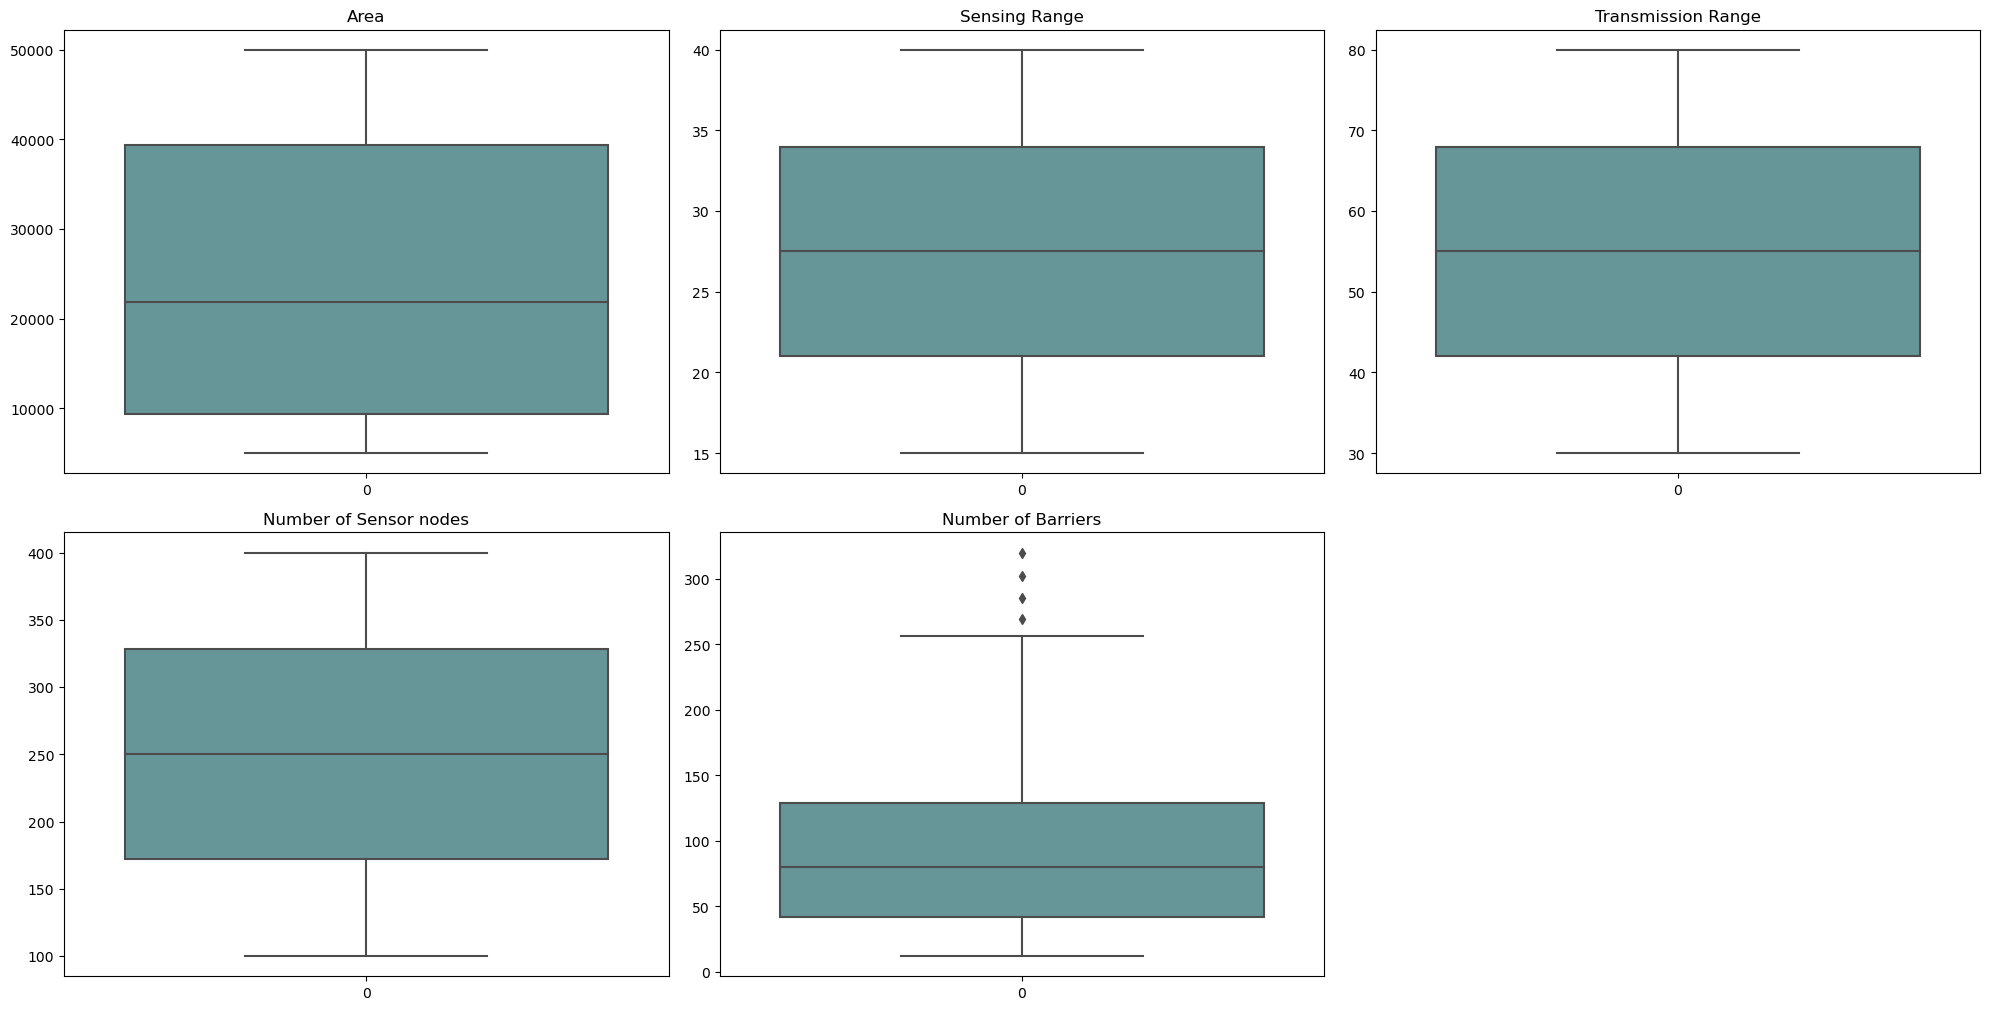

In [6]:
# Visualize outliers using box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[column], color='cadetblue')
    plt.title(column)
plt.tight_layout()
plt.show()

## Outlier Detection

In [7]:
# Find out the Quantile Range
Q1 = data.quantile(.25)
Q3 = data.quantile(.75)
IQR = Q3 - Q1
print('The Inter Quantile Range:\n', IQR)
print('')
# Find out upper and lower bounds
upper = Q3+(IQR*1.5)
lower = Q1-(IQR*1.5)
print('Upper Bound:\n', upper)
print('')
print('Lower Bound:\n', lower)
print('')

display("Data before removing outliers:", data.describe())

# Remove Outlier
data = data[~((data < lower) | (data > upper)).any(axis=1)]
display("Data after removing outliers:", data.describe())


The Inter Quantile Range:
 Area                      30000.00
Sensing Range                13.00
Transmission Range           26.00
Number of Sensor nodes      156.00
Number of Barriers           86.75
dtype: float64

Upper Bound:
 Area                      84375.000
Sensing Range                53.500
Transmission Range          107.000
Number of Sensor nodes      562.000
Number of Barriers          258.875
dtype: float64

Lower Bound:
 Area                     -35625.000
Sensing Range                 1.500
Transmission Range            3.000
Number of Sensor nodes      -62.000
Number of Barriers          -88.125
dtype: float64



'Data before removing outliers:'

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,182.000000,182.00000,182.000000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000,94.071429
std,15197.252769,7.52069,15.041379,90.248276,65.171006
min,5000.000000,15.00000,30.000000,100.000000,12.000000
25%,9375.000000,21.00000,42.000000,172.000000,42.000000
50%,21875.000000,27.50000,55.000000,250.000000,80.000000
75%,39375.000000,34.00000,68.000000,328.000000,128.750000
max,50000.000000,40.00000,80.000000,400.000000,320.000000


'Data after removing outliers:'

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,24810.393258,27.252809,54.505618,247.033708,89.578652
std,15083.162971,7.417198,14.834396,89.006373,58.407752
min,5000.000000,15.000000,30.000000,100.000000,12.000000
25%,9375.000000,21.000000,42.000000,172.000000,41.250000
50%,21875.000000,27.000000,54.000000,244.000000,78.000000
75%,39375.000000,33.750000,67.500000,325.000000,126.750000
max,50000.000000,40.000000,80.000000,400.000000,256.000000


## Exploratory Data Analysis (EDA)

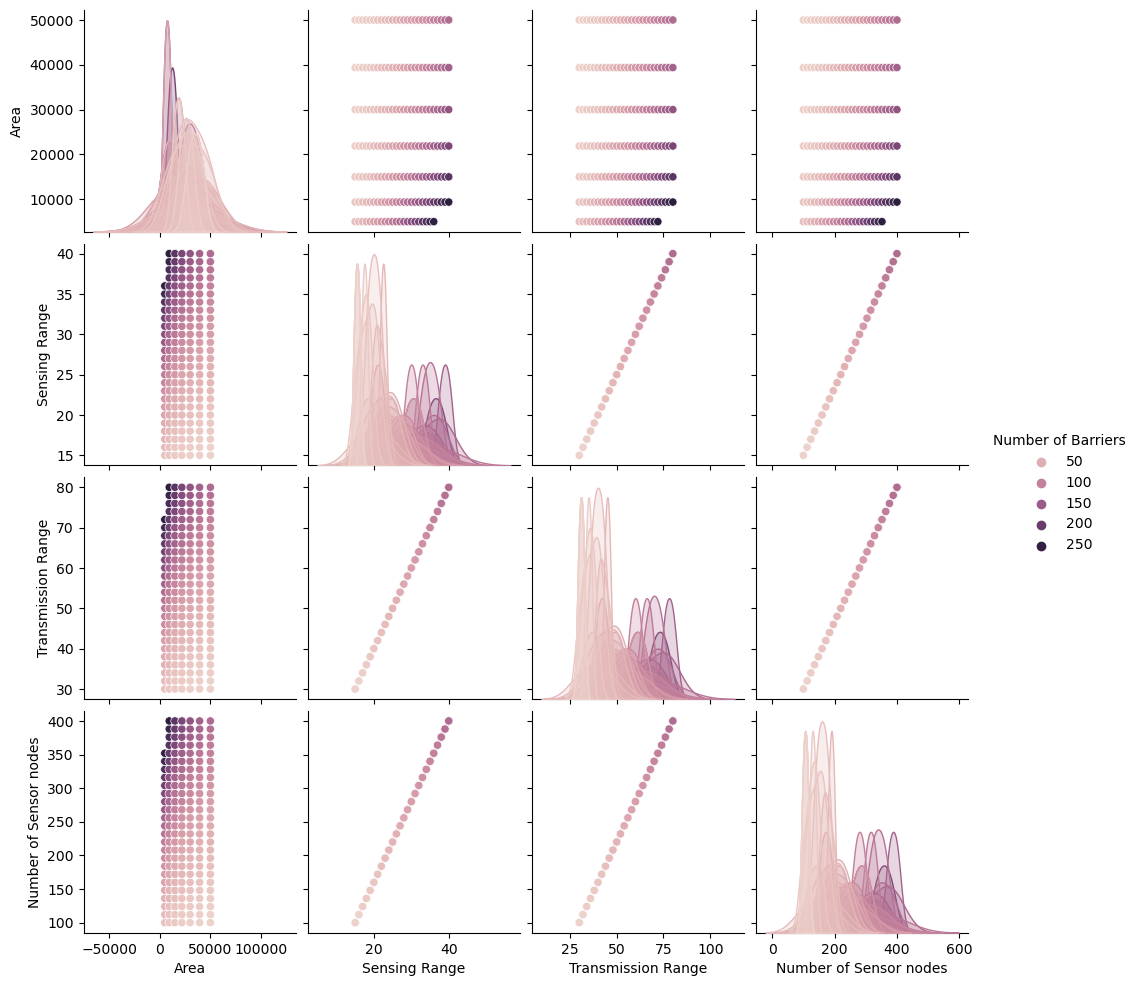

In [8]:
# Pairplot to visualize distributions and relationships between pairs of variables
sns.pairplot(data, hue='Number of Barriers')
plt.show()

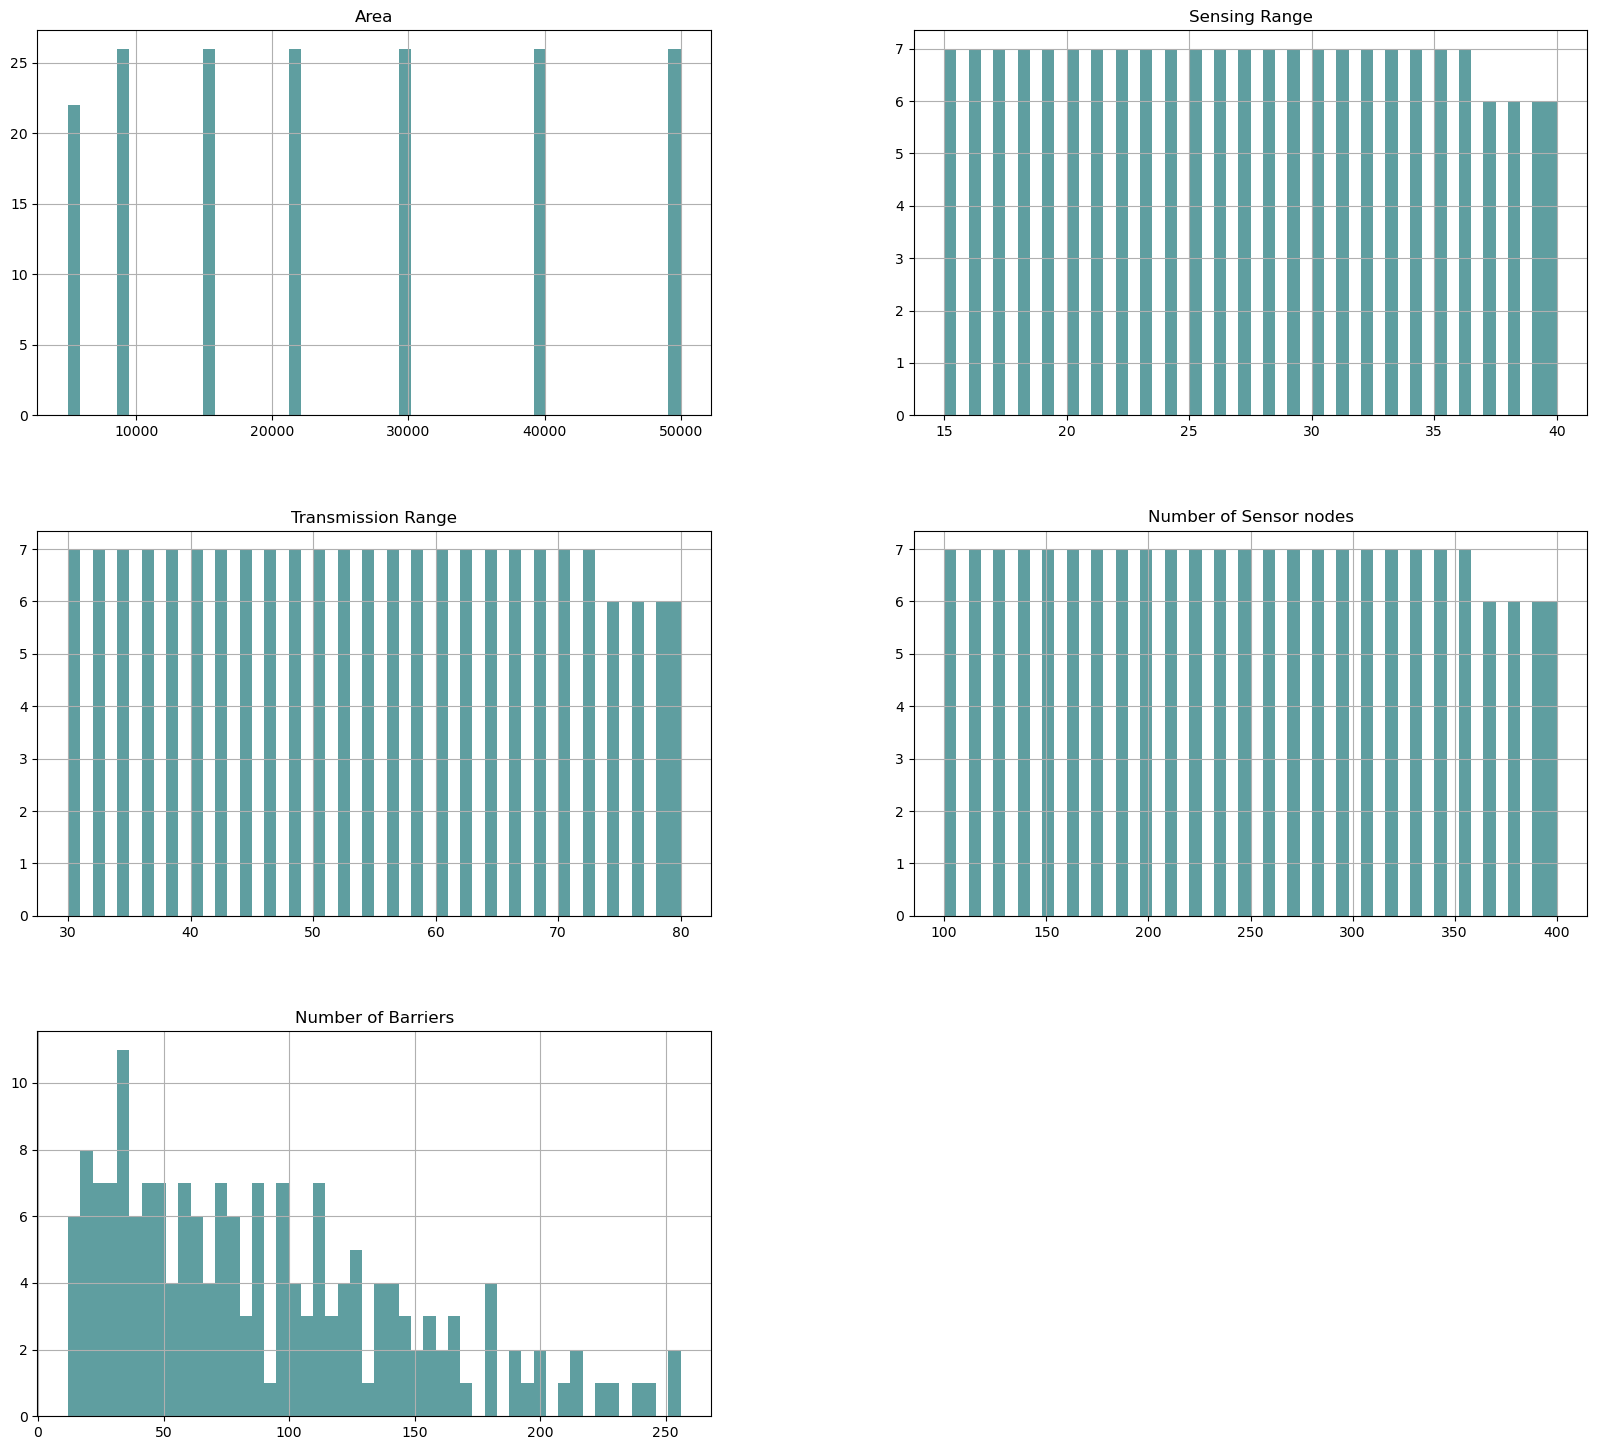

In [9]:
# Histogram to see the distribution of the variables
data.hist(bins=50, figsize=(20, 18), color='cadetblue')
plt.show()

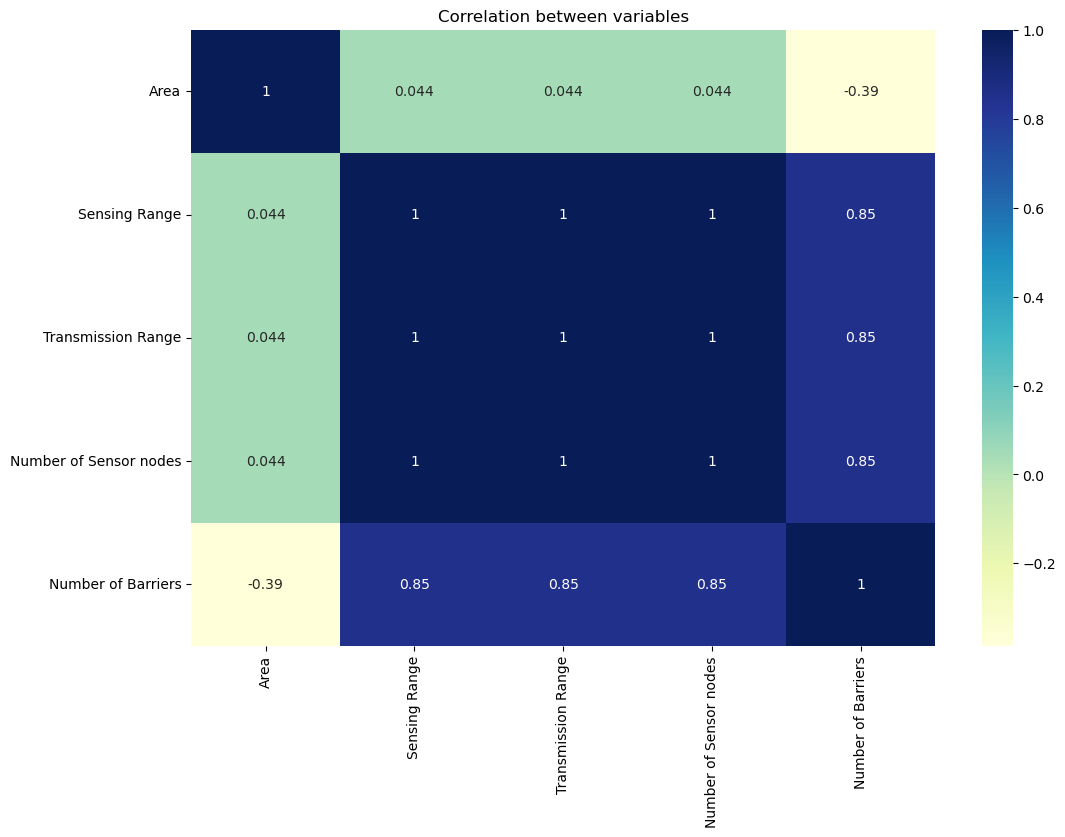

In [10]:
# Correlation matrix to find relationships between variables
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.title('Correlation between variables')
plt.show()


Ploting scatter chart between the most relevant features with number of barriers

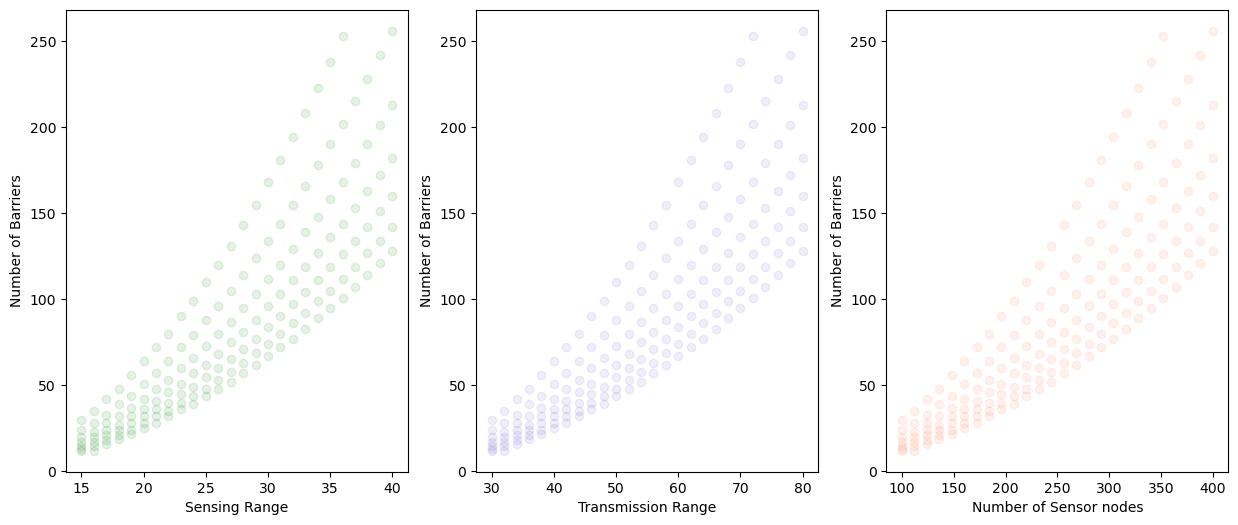

In [11]:
# Define the most relevant features with the target variable

plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.scatter(data['Sensing Range'], data['Number of Barriers'], alpha=0.1, color="g")
plt.xlabel('Sensing Range')
plt.ylabel('Number of Barriers')

plt.subplot(1,3,2)
plt.scatter(data['Transmission Range'], data['Number of Barriers'], alpha=0.1, color="slateblue")
plt.xlabel('Transmission Range')
plt.ylabel('Number of Barriers')

plt.subplot(1,3,3)
plt.scatter(data['Number of Sensor nodes'], data['Number of Barriers'], alpha=0.1, color="coral")
plt.xlabel('Number of Sensor nodes')
plt.ylabel('Number of Barriers')
plt.show()

### Data Procesing

In [12]:
X = data.drop('Number of Barriers', axis=1) # input features
y = data['Number of Barriers']  # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
display(X_train_scaled, X_test_scaled)

array([[ 1.64622947, -0.73895021, -0.73895021, -0.73895021],
       [ 0.93759931, -0.09122842, -0.09122842, -0.09122842],
       [-0.22955625,  1.59284824,  1.59284824,  1.59284824],
       [ 1.64622947, -0.60940586, -0.60940586, -0.60940586],
       [-1.06323879,  0.55649337,  0.55649337,  0.55649337],
       [ 0.3123374 , -0.4798615 , -0.4798615 , -0.4798615 ],
       [-0.22955625, -0.09122842, -0.09122842, -0.09122842],
       [-0.68808165,  1.07467081,  1.07467081,  1.07467081],
       [ 0.93759931,  0.68603773,  0.68603773,  0.68603773],
       [-1.35502768, -1.25712765, -1.25712765, -1.25712765],
       [ 0.3123374 , -1.51621637, -1.51621637, -1.51621637],
       [ 0.3123374 ,  1.33375952,  1.33375952,  1.33375952],
       [ 1.64622947, -1.25712765, -1.25712765, -1.25712765],
       [-0.68808165, -1.12758329, -1.12758329, -1.12758329],
       [-0.22955625, -1.25712765, -1.25712765, -1.25712765],
       [-0.68808165, -0.4798615 , -0.4798615 , -0.4798615 ],
       [-1.06323879, -0.

array([[-1.35502768,  0.94512645,  0.94512645,  0.94512645],
       [-1.06323879,  1.46330388,  1.46330388,  1.46330388],
       [ 0.93759931,  0.29740465,  0.29740465,  0.29740465],
       [-1.06323879, -0.4798615 , -0.4798615 , -0.4798615 ],
       [-0.68808165,  0.94512645,  0.94512645,  0.94512645],
       [-1.35502768,  0.55649337,  0.55649337,  0.55649337],
       [ 0.3123374 ,  0.94512645,  0.94512645,  0.94512645],
       [ 1.64622947,  1.33375952,  1.33375952,  1.33375952],
       [ 0.3123374 , -0.35031714, -0.35031714, -0.35031714],
       [ 0.93759931,  0.42694901,  0.42694901,  0.42694901],
       [-1.06323879, -1.25712765, -1.25712765, -1.25712765],
       [ 0.93759931,  1.59284824,  1.59284824,  1.59284824],
       [-1.06323879,  0.94512645,  0.94512645,  0.94512645],
       [ 0.3123374 ,  0.81558209,  0.81558209,  0.81558209],
       [-1.35502768,  0.42694901,  0.42694901,  0.42694901],
       [ 0.3123374 , -0.09122842, -0.09122842, -0.09122842],
       [ 0.3123374 ,  0.

In [14]:
# Create DataFrame for the scaled training data
scaled_data = pd.DataFrame(X_train_scaled, columns=X.columns)

# Display statistical summary of the scaled training data
print('Statistic Summary after scaling the data:\n', scaled_data.describe())

Statistic Summary after scaling the data:
                Area  Sensing Range  Transmission Range  Number of Sensor nodes
count  1.420000e+02   1.420000e+02        1.420000e+02            1.420000e+02
mean   3.752867e-17   1.250956e-17        1.250956e-17           -1.438599e-16
std    1.003540e+00   1.003540e+00        1.003540e+00            1.003540e+00
min   -1.355028e+00  -1.516216e+00       -1.516216e+00           -1.516216e+00
25%   -6.880816e-01  -8.684946e-01       -8.684946e-01           -8.684946e-01
50%   -2.295562e-01  -9.122842e-02       -9.122842e-02           -9.122842e-02
75%    9.375993e-01   8.155821e-01        8.155821e-01            8.155821e-01
max    1.646229e+00   1.722393e+00        1.722393e+00            1.722393e+00


## Correlation

We use correlation analysis to select features based on their correlation with the target variable. Features with high correlation (above 0.5 or below -0.5) are selected for further analysis.

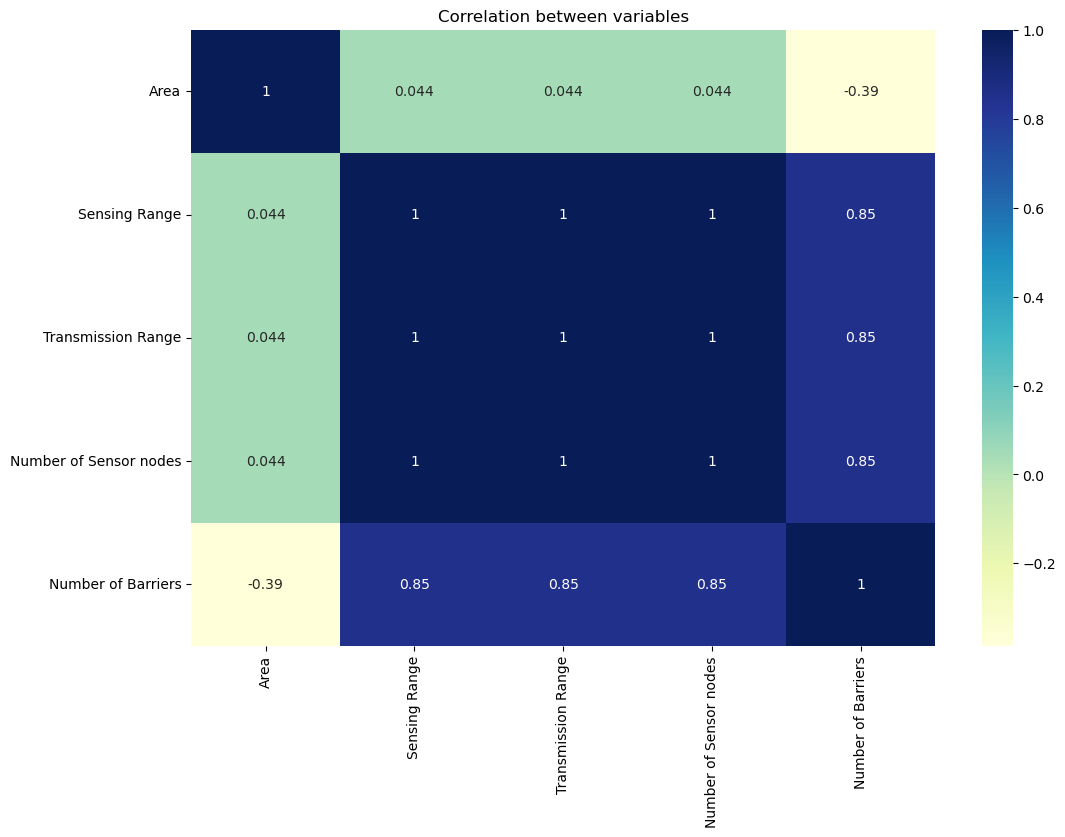

Correlations with Number of Barriers:
 Number of Barriers        1.000000
Sensing Range             0.851522
Transmission Range        0.851522
Number of Sensor nodes    0.851522
Area                     -0.385202
Name: Number of Barriers, dtype: float64

Selected features based on correlation:
 Index(['Sensing Range', 'Transmission Range', 'Number of Sensor nodes'], dtype='object')


In [15]:
# Correlation matrix to find relationships between variables
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.title('Correlation between variables')
plt.show()

print("Correlations with Number of Barriers:\n", correlation['Number of Barriers'].sort_values(ascending=False))
print('')
# Select features with high correlation (above 0.5 or below -0.5 for simplicity)
selected_features = correlation['Number of Barriers'][np.abs(correlation['Number of Barriers']) > 0.5].index.drop('Number of Barriers')
print("Selected features based on correlation:\n", selected_features)

### Feature Importances
This method ranks features based on their contribution to the model's predictive power. We train a Random Forest model and plot the feature importances to identify the most important features.


Feature ranking:
1. feature Number of Sensor nodes (0.29740100592794994)
2. feature Sensing Range (0.29685189770274645)
3. feature Transmission Range (0.2233911076701804)
4. feature Area (0.1823559886991232)


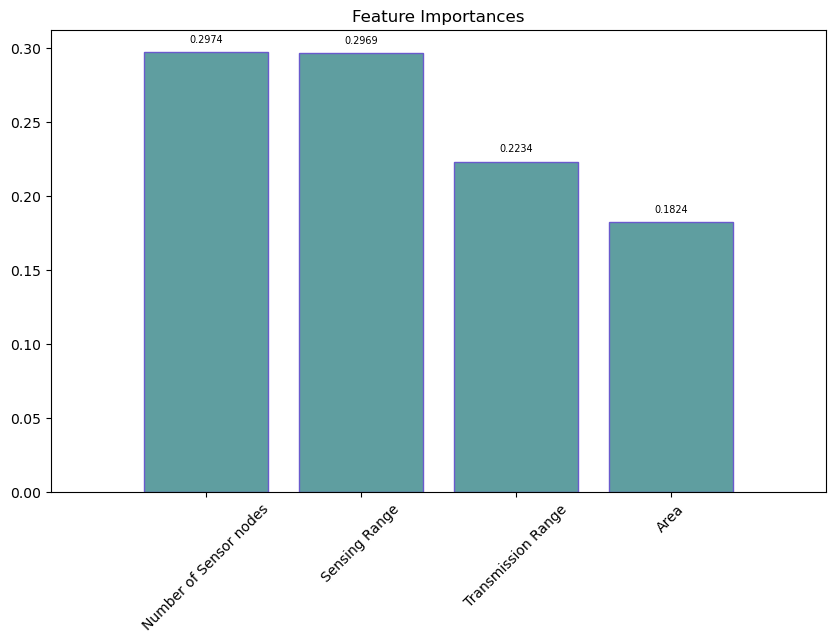

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {data.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bar_chart = plt.bar(range(X.shape[1]), importances[indices], align="center", color='cadetblue', edgecolor='slateblue')
plt.xticks(range(X.shape[1]), data.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])

# Add data labels
for bar, importance in zip(bar_chart, importances[indices]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(importance, 4), ha='center', va='bottom', fontsize=7)
plt.show()

#### Principal Component Analysis (PCA)

In [17]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio
print("Explained variance ratio:\n", pca.explained_variance_ratio_)

Explained variance ratio:
 [7.50454893e-01 2.49545107e-01 6.08761437e-33 1.63733972e-33]


# Linear Regression

Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.



#### Multiple Linear Regression

What if we want to predict number of barriers using more than one variable?

If we want to use more variables in our model to predict number of barriers, we can use **Multiple Linear Regression**. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and **two or more **predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
$$

$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
$$

The equation is given by:
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3
$$

From the previous section we know that other good predictors of barriers could be:

- Sensing Range
- Transmission Range
- Number of Sensor Nodes

Let's develop a model using these variables as the predictor variables.

In [18]:
# Creat the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [19]:
#X = data[['Sensing Range', 'Transmission Range', 'Number of Sensor nodes']]  # input features
#y = data['Number of Barriers']  # target variable

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Number of test samples: ', X_test.shape[0])
print('Number of training samplse: ', X_train.shape[0])

# Fit the linear model using the three above-mentioned variables.

lm.fit(X_train_pca, y_train)


Number of test samples:  36
Number of training samplse:  142


LinearRegression()

In [20]:
# The value of the intercept (a)
print('The value of the intercept (a):\n', lm.intercept_)
print('')
# the values of the coefficients (b1, b2, b3, b4)
print('the values of the coefficients:\n', lm.coef_)

The value of the intercept (a):
 85.16197183098592

the values of the coefficients:
 [ 2.93314312e+01 -2.34317291e+01 -2.86158897e-14  2.60144452e-15]


As we saw above, we should get a final linear function with the structure:

$$
Yhat = 85.16197183098592 + -2.34317291e+01* Sensing Rage + -1.01456336e-13* Transmission Rage + 3.25180565e-15*Number of Sensor nodes
$$

####  Regression Plot

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [21]:
# First, let's make a prediction
# Prediction Using training data
linear_train = lm.predict(X_train_pca)

# Prediction Using test data
linear_test = lm.predict(X_test_pca)

#  calculate the R^2 on the test data
print('the R^2 of Linear Regression on the test data:\n', lm.score(X_test_pca, y_test))
print('')
#  calculate the R^2 on the training data
print('the R^2 of Linear Regression on the training data:\n', lm.score(X_train_pca, y_train))

the R^2 of Linear Regression on the test data:
 0.8474942208123317

the R^2 of Linear Regression on the training data:
 0.9115405973160793


The R^2 is much smaller using the test data compared to the training data

In [22]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(10, 6))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName, legend=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1, legend=BlueName)

    plt.title(Title)
    plt.xlabel('Number of Barriers')
    plt.ylabel('Proportion of Barriers ')
    plt.legend()
    plt.show()
    plt.close()

In [23]:
def PollyPlot(X_train_pca, X_test_pca, y_train, y_test, lr,poly_transform):
    plt.figure(figsize=(10, 16))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([X_train_pca.values.max(), X_test_pca.values.max()])

    xmin=min([X_train_pca.values.min(), X_test_pca.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(X_train_pca, y_train, 'ro', label='Training Data')
    plt.plot(X_test_pca, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [24]:
# Linear Regression Training and Testing Accuracy

train_r2_lm = r2_score(y_train, linear_train)
train_mse_lm = mean_squared_error(y_train, linear_train)
train_rmse_lm = np.sqrt(train_mse_lm)
train_mae_lm = mean_absolute_error(y_train, linear_train)

print(f"Linear Regression Training:\nR2: {train_r2_lm}\nMSE: {train_mse_lm}\nRMSE: {train_rmse_lm}\nMAE: {train_mae_lm}\n")

r2_lm = r2_score(y_test, linear_test)
mse_lm = mean_squared_error(y_test, linear_test)
rmse_lm = np.sqrt(mse_lm)
mae_lm = mean_absolute_error(y_test, linear_test)

print(f"Linear Regression Testing:\nR2: {r2_lm}\nMSE: {mse_lm}\nRMSE: {rmse_lm}\nMAE: {mae_lm}\n")

Linear Regression Training:
R2: 0.9115405973160793
MSE: 303.8065141683191
RMSE: 17.430046304250574
MAE: 13.001568970891972

Linear Regression Testing:
R2: 0.8474942208123317
MSE: 433.98908485166277
RMSE: 20.83240468240915
MAE: 16.76059298834082



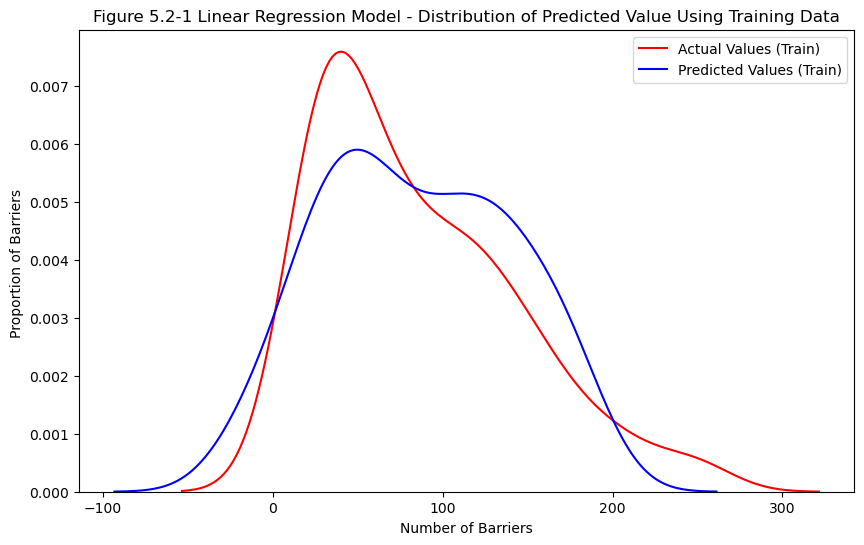

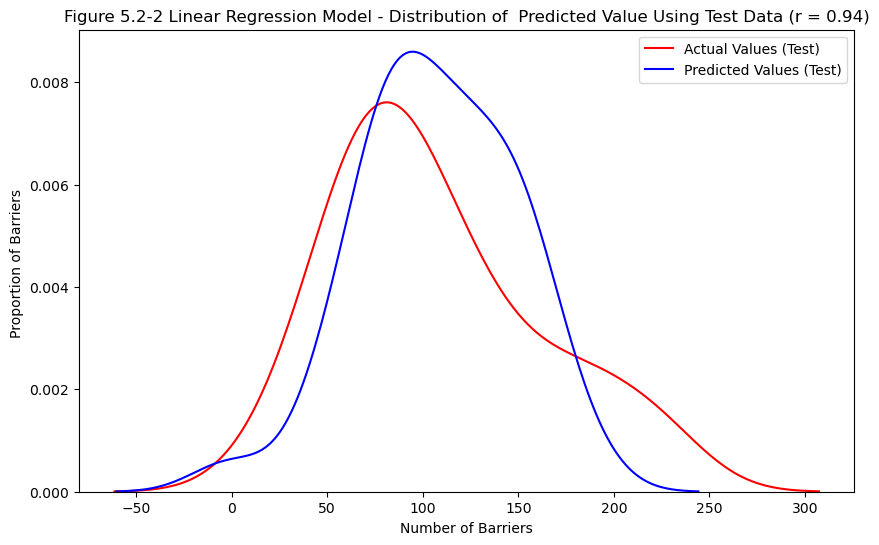

None

None

In [25]:
Title1 = 'Figure 5.2-1 Linear Regression Model - Distribution of Predicted Value Using Training Data'
Dis1 = DistributionPlot(y_train, linear_train, "Actual Values (Train)", "Predicted Values (Train)", Title1)

Title2='Figure 5.2-2 Linear Regression Model - Distribution of  Predicted Value Using Test Data (r = {0:0.2f})'.format(pearsonr(y_test, linear_test)[0], 2)
Dis2 = DistributionPlot(y_test, linear_test,"Actual Values (Test)","Predicted Values (Test)",Title2)

display(Dis1, Dis2)

# Decision Tree

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It works by recursively splitting the data into subsets based on the values of input features, forming a tree-like structure. In this dataset, a Decision Tree can be used to predict the number of barriers in a Wireless Sensor Network (WSN) by learning from the features such as area, sensing range, transmission range, and number of sensor nodes.

In [26]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train_pca, y_train)
tree_model = dt.predict(X_test_pca)

# Evaluation

# Decision Tree Training and Testing Accuracy
train_pred_dt = dt.predict(X_train_pca)
train_r2_dt = r2_score(y_train, train_pred_dt)
train_mse_dt = mean_squared_error(y_train, train_pred_dt)
train_rmse_dt = np.sqrt(train_mse_dt)
train_mae_dt = mean_absolute_error(y_train, train_pred_dt)

print(f"Decision Tree Training:\nR2: {train_r2_dt}\nMSE: {train_mse_dt}\nRMSE: {train_rmse_dt}\nMAE: {train_mae_dt}\n")

r2_dt = r2_score(y_test, tree_model)
mse_dt = mean_squared_error(y_test, tree_model)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, tree_model)

print(f"Decision Tree Testing:\nR2: {r2_dt}\nMSE: {mse_dt}\nRMSE: {rmse_dt}\nMAE: {mae_dt}\n")

Decision Tree Training:
R2: 1.0
MSE: 0.0
RMSE: 0.0
MAE: 0.0

Decision Tree Testing:
R2: 0.9446830525349941
MSE: 157.41666666666666
RMSE: 12.54657987926059
MAE: 10.63888888888889



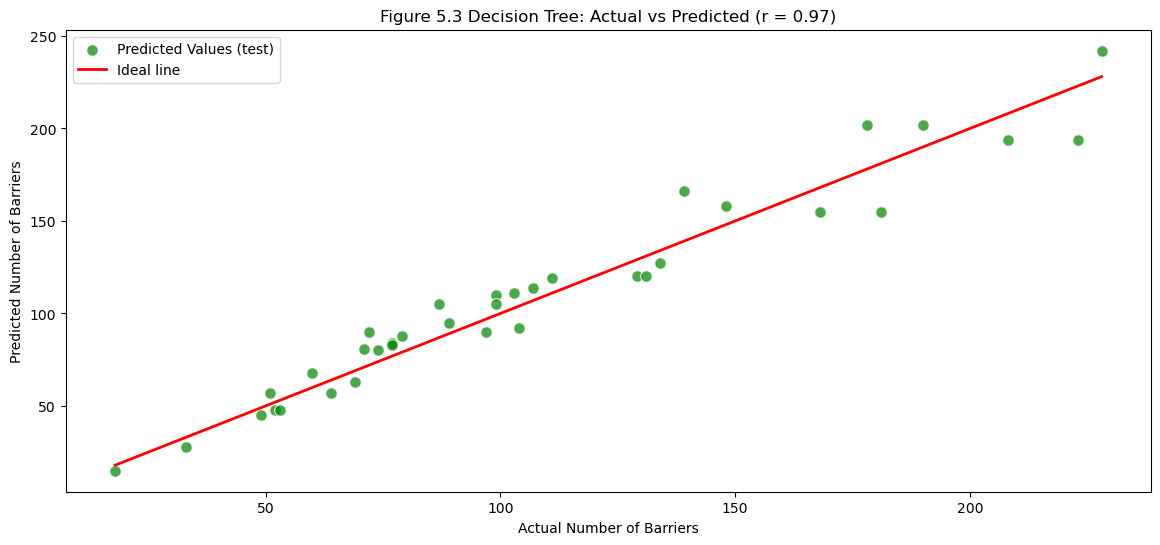

In [27]:
# Plotting actual vs predicted values for Decision Tree
plt.figure(figsize=(14, 6))

plt.scatter(y_test, tree_model, color='green', edgecolor='w', alpha=0.7, s=70, label='Predicted Values (test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal line')
plt.xlabel('Actual Number of Barriers')
plt.ylabel('Predicted Number of Barriers')
plt.title('Figure 5.3 Decision Tree: Actual vs Predicted (r = {0:0.2f})'.format(pearsonr(y_test, tree_model)[0], 2))
plt.legend()
plt.show()

# Random Forest

Random Forest is an ensemble learning method that enhances the performance and stability of a model by combining multiple Decision Trees. It works by generating a large number of trees during training and aggregating their predictions. For regression tasks like this WSN-IDS dataset, the mean prediction of the individual trees is taken.

In [28]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train_pca, y_train)
forest_model = rf.predict(X_test_pca)

# Evaluation
# Random Forest Training and Testing Accuracy
train_pred_rf = rf.predict(X_train_pca)
train_r2_rf = r2_score(y_train, train_pred_rf)
train_mse_rf = mean_squared_error(y_train, train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_mae_rf = mean_absolute_error(y_train, train_pred_rf)

print(f"Random Forest Training:\nR2: {train_r2_rf}\nMSE: {train_mse_rf}\nRMSE: {train_rmse_rf}\nMAE: {train_mae_rf}\n")

r2_rf = r2_score(y_test, forest_model)
mse_rf = mean_squared_error(y_test, forest_model)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, forest_model)

print(f"Random Forest Testing:\nR2: {r2_rf}\nMSE: {mse_rf}\nRMSE: {rmse_rf}\nMAE: {mae_rf}\n")

Random Forest Training:
R2: 0.9986738587746278
MSE: 4.554522535211266
RMSE: 2.1341327360806934
MAE: 1.3442253521126761

Random Forest Testing:
R2: 0.986494100306503
MSE: 38.43403888888888
RMSE: 6.199519246593955
MAE: 4.495555555555556



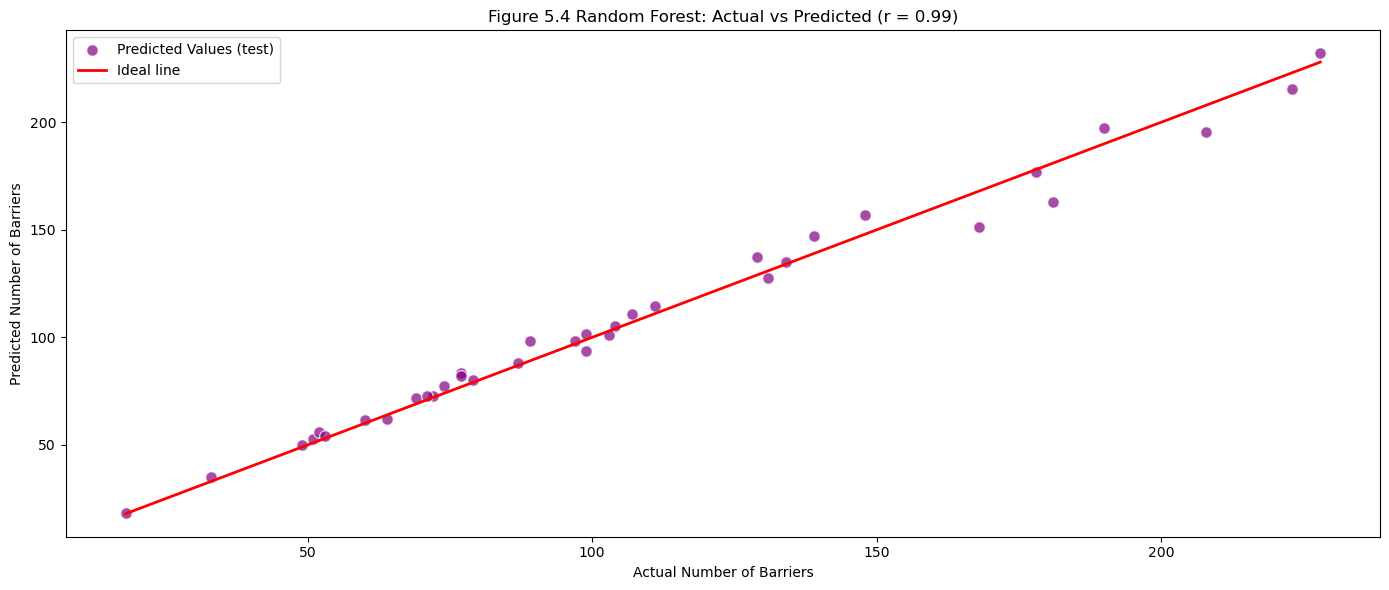

In [29]:
# Plotting actual vs predicted values for Random Forest
plt.figure(figsize=(14, 6))
plt.scatter(y_test, forest_model, color='purple', edgecolor='w', alpha=0.7, s=70, label='Predicted Values (test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal line')
plt.xlabel('Actual Number of Barriers')
plt.ylabel('Predicted Number of Barriers')
plt.title('Figure 5.4 Random Forest: Actual vs Predicted (r = {0:0.2f})'.format(pearsonr(y_test, forest_model)[0], 2))
plt.legend()
plt.tight_layout()
plt.show()

#### Plotting Random Forest Error Bars

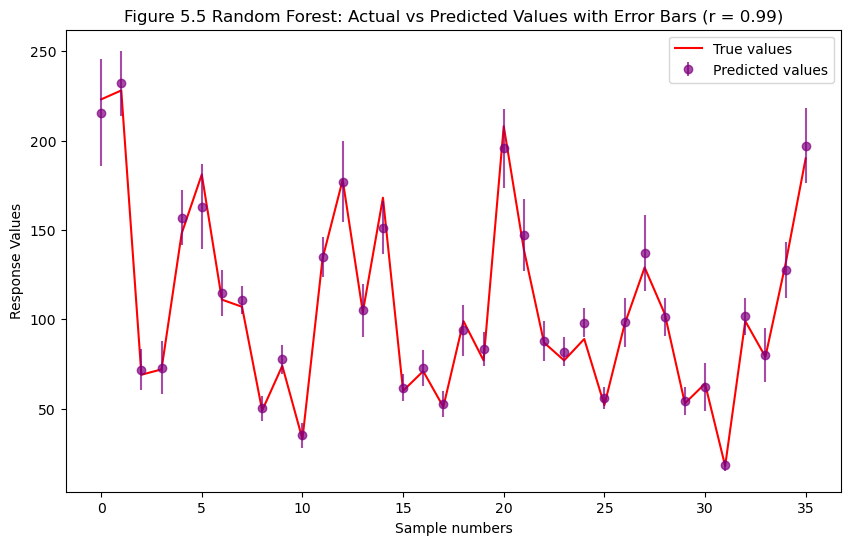

In [30]:

# Calculate the variance
rf_std = np.std([est.predict(X_test_pca) for est in rf.estimators_], axis=0)

# Plot predicted Number of Barriers with error bars
plt.figure(figsize=(10, 6))

# Plot true values
plt.plot(range(len(y_test)), y_test, 'r-', label='True values')

# Plot predicted values with error bars
plt.errorbar(range(len(y_test)), forest_model, yerr=rf_std, fmt='o', color='purple', label='Predicted values', alpha=0.7)

# Add labels and title
plt.xlabel('Sample numbers')
plt.ylabel('Response Values')
plt.title('Figure 5.5 Random Forest: Actual vs Predicted Values with Error Bars (r = {0:0.2f})'.format(pearsonr(y_test, forest_model)[0], 2))
plt.legend()

plt.show()

### Model Comparison

# Model Training and Evaluation

We train and evaluate three regression models:

- Multiple Linear Regression
- Decision Tree
- Random Forest

We use four evaluation metrics to measure model performance:

- R² (coefficient of determination),
- Mean Squared Error (MSE),
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)

The model with the higher R-squared value is a better fit for the data.

The model with the smallest MSE value is a better fit for the data.

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>

Training model performance metrics (normalized):
                          R2       MSE     RMSE       MAE
Linear Regression  0.911541  1.000000  1.00000  1.000000
Decision Tree      1.000000  0.000000  0.00000  0.000000
Random Forest      0.998674  0.014992  0.12244  0.103389

Testing model performance metrics (normalized):
                          R2       MSE      RMSE       MAE
Linear Regression  0.847494  1.000000  1.000000  1.000000
Decision Tree      0.944683  0.300799  0.433753  0.500882
Random Forest      0.986494  0.000000  0.000000  0.000000


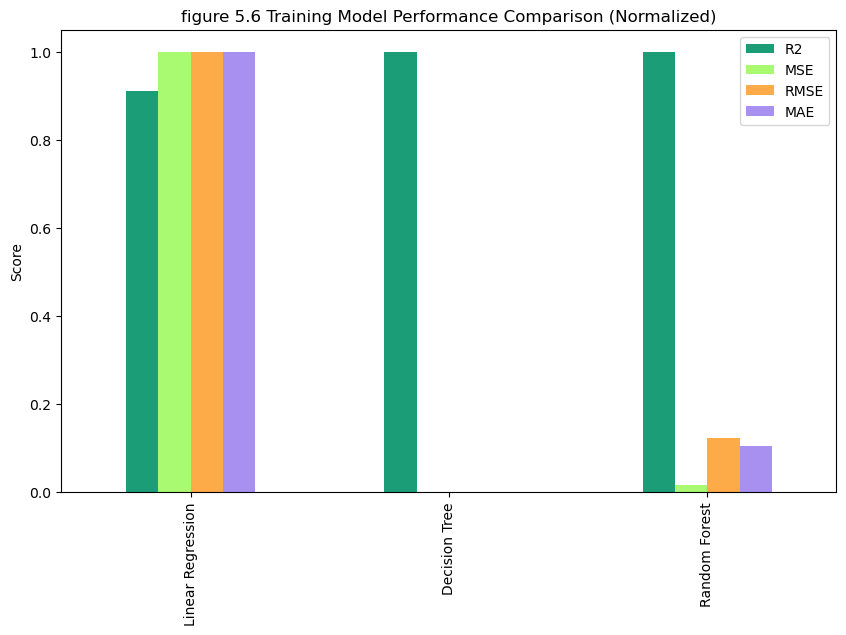

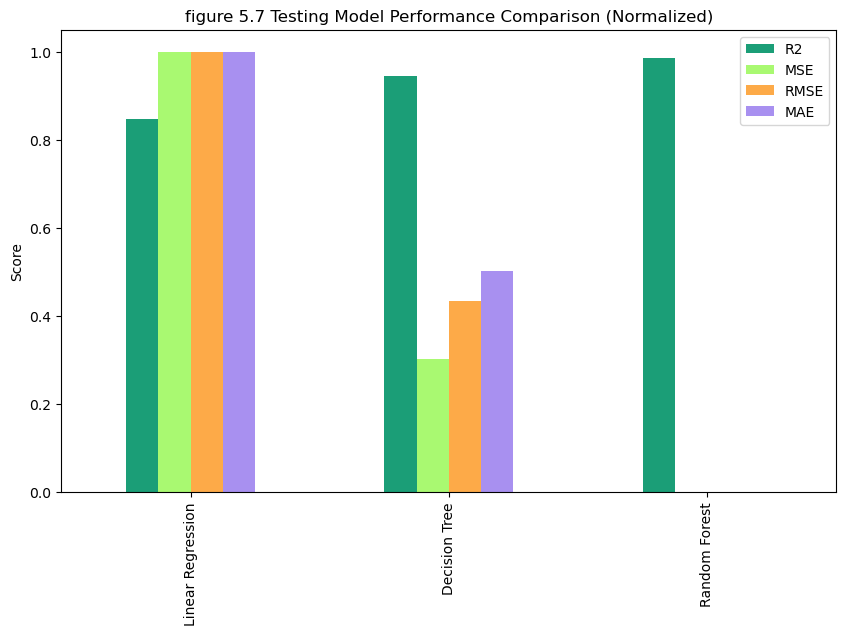

In [31]:
# Normalizing the metrics for plotting
def normalize(values):
    return (values - np.min(values)) / (np.max(values) - np.min(values))

# Training results normalization
train_mse_lm_norm = normalize(np.array([train_mse_lm, train_mse_dt, train_mse_rf]))
train_rmse_lm_norm = normalize(np.array([train_rmse_lm, train_rmse_dt, train_rmse_rf]))
train_mae_lm_norm = normalize(np.array([train_mae_lm, train_mae_dt, train_mae_rf]))

train_results_norm = {
    'Linear Regression': [train_r2_lm, train_mse_lm_norm[0], train_rmse_lm_norm[0], train_mae_lm_norm[0]],
    'Decision Tree': [train_r2_dt, train_mse_lm_norm[1], train_rmse_lm_norm[1], train_mae_lm_norm[1]],
    'Random Forest': [train_r2_rf, train_mse_lm_norm[2], train_rmse_lm_norm[2], train_mae_lm_norm[2]]
}

train_results_df_norm = pd.DataFrame(train_results_norm, index=['R2', 'MSE', 'RMSE', 'MAE']).T
print("Training model performance metrics (normalized):\n", train_results_df_norm)
print("")

# Testing results normalization
test_mse_lm_norm = normalize(np.array([mse_lm, mse_dt, mse_rf]))
test_rmse_lm_norm = normalize(np.array([rmse_lm, rmse_dt, rmse_rf]))
test_mae_lm_norm = normalize(np.array([mae_lm, mae_dt, mae_rf]))

test_results_norm = {
    'Linear Regression': [r2_lm, test_mse_lm_norm[0], test_rmse_lm_norm[0], test_mae_lm_norm[0]],
    'Decision Tree': [r2_dt, test_mse_lm_norm[1], test_rmse_lm_norm[1], test_mae_lm_norm[1]],
    'Random Forest': [r2_rf, test_mse_lm_norm[2], test_rmse_lm_norm[2], test_mae_lm_norm[2]]
}

test_results_df_norm = pd.DataFrame(test_results_norm, index=['R2', 'MSE', 'RMSE', 'MAE']).T
print("Testing model performance metrics (normalized):\n", test_results_df_norm)

# Plotting the normalized training results
colors = ['#1b9e77', '#a9f971', '#fdaa48', '#A890F0']


train_results_df_norm.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('figure 5.6 Training Model Performance Comparison (Normalized)')
plt.ylabel('Score')

# Plotting the normalized testing results

test_results_df_norm.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('figure 5.7 Testing Model Performance Comparison (Normalized)')
plt.ylabel('Score')

plt.show()


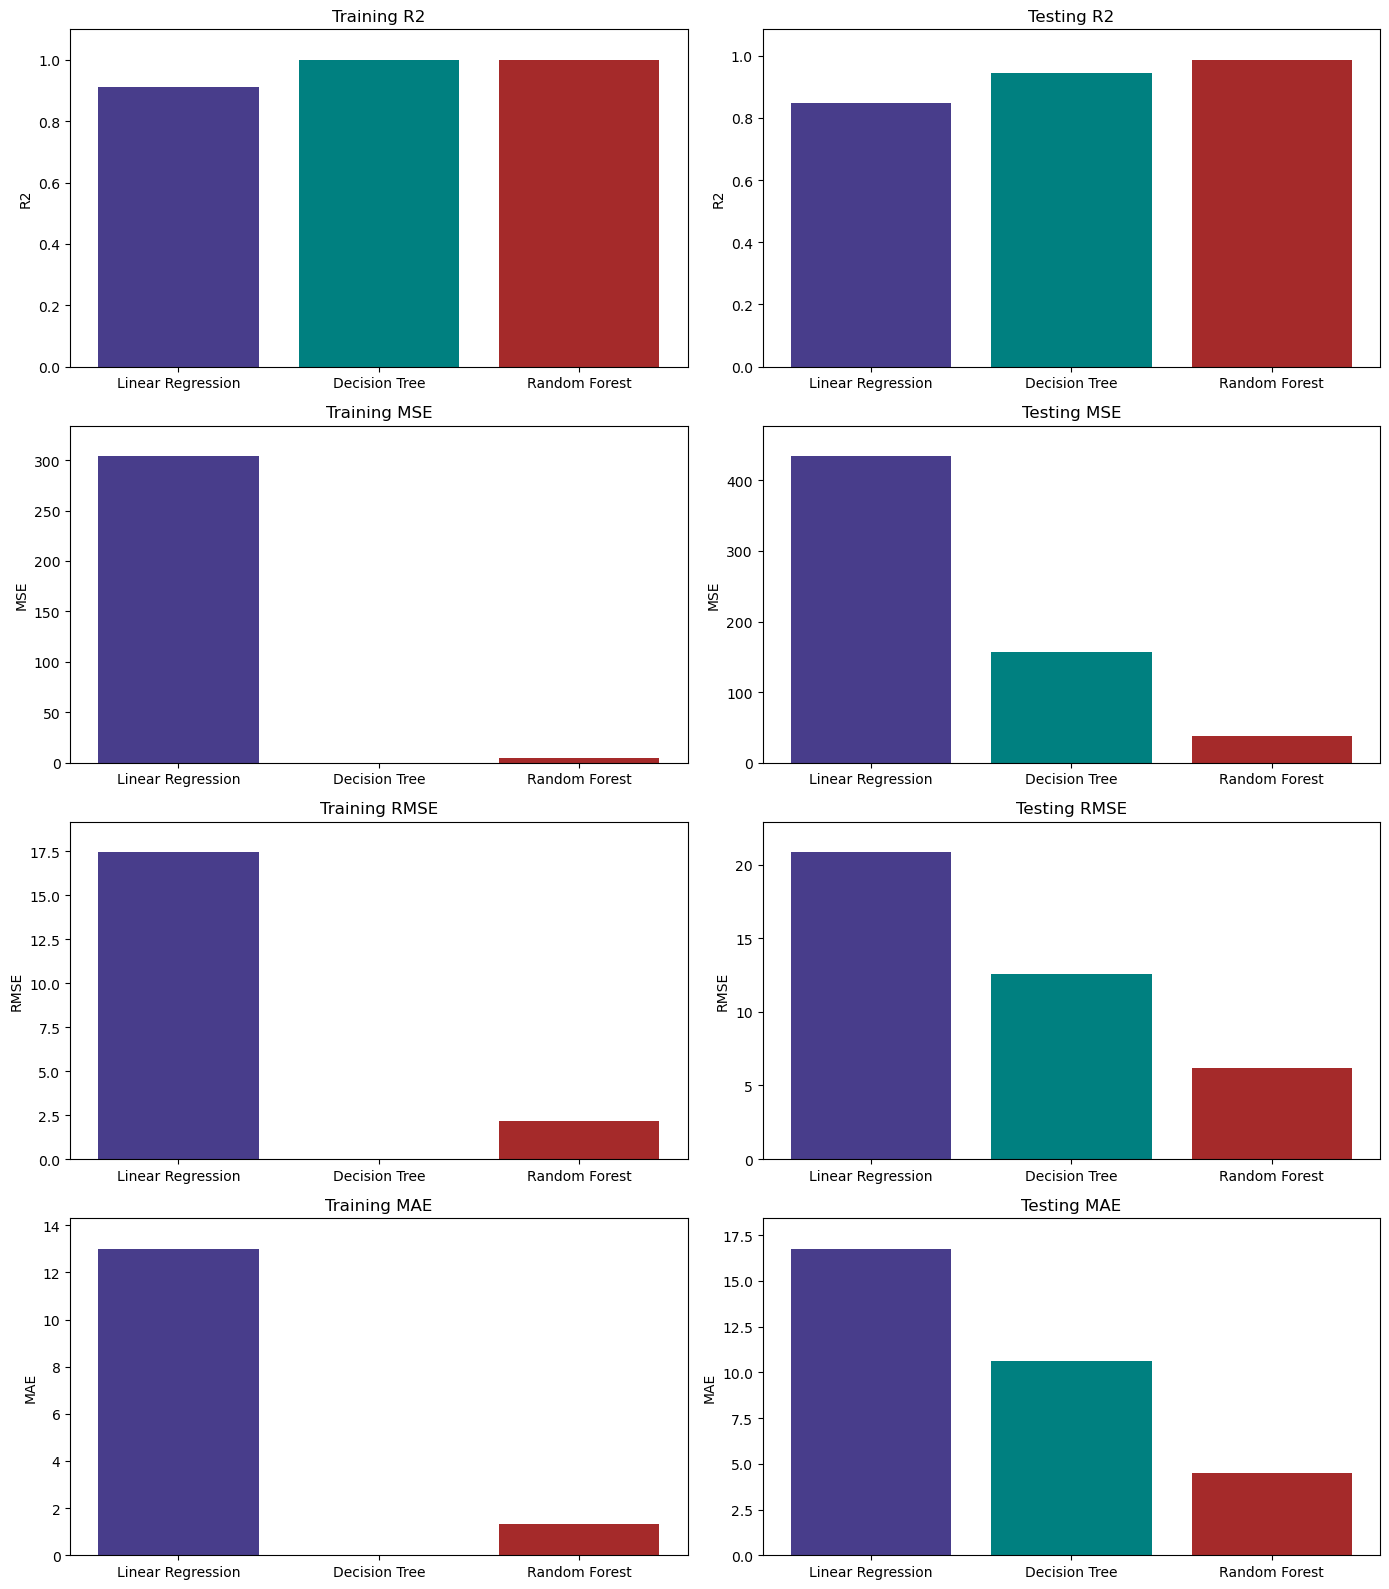

In [32]:
# Define the metrics for each model
train_results = {
    'Linear Regression': [train_r2_lm, train_mse_lm, train_rmse_lm, train_mae_lm],
    'Decision Tree': [train_r2_dt, train_mse_dt, train_rmse_dt, train_mae_dt],
    'Random Forest': [train_r2_rf, train_mse_rf, train_rmse_rf, train_mae_rf]
}

test_results = {
    'Linear Regression': [r2_lm, mse_lm, rmse_lm, mae_lm],
    'Decision Tree': [r2_dt, mse_dt, rmse_dt, mae_dt],
    'Random Forest': [r2_rf, mse_rf, rmse_rf, mae_rf]
}

metrics = ['R2', 'MSE', 'RMSE', 'MAE']
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Plotting function
def plot_metrics(train_results, test_results, metrics, models):
    num_metrics = len(metrics)
    fig, axes = plt.subplots(num_metrics, 2, figsize=(14, 4*num_metrics))

    for i, metric in enumerate(metrics):
        train_values = [train_results[model][i] for model in models]
        test_values = [test_results[model][i] for model in models]

        # Plot training metrics
        axes[i, 0].bar(models, train_values, color=['darkslateblue', 'teal', 'brown'])
        axes[i, 0].set_title(f'Training {metric}')
        axes[i, 0].set_ylabel(metric)
        axes[i, 0].set_ylim(0, max(train_values) * 1.1)  # Add some space above the highest bar

        # Plot testing metrics
        axes[i, 1].bar(models, test_values, color=['darkslateblue', 'teal', 'brown'])
        axes[i, 1].set_title(f'Testing {metric}')
        axes[i, 1].set_ylabel(metric)
        axes[i, 1].set_ylim(0, max(test_values) * 1.1)  # Add some space above the highest bar

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(train_results, test_results, metrics, models)

## Decision Making: Determining a Good Model Fit

Now
that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

Linear Regression Testing:
R-squared  0.847494  
MSE: 1.000000  

Decision Tree: 
R-squared   0.945513  
MSE   0.298241  

Random Forest:
R-squared   0.987170  
MSE   0.000000  
¶

## Conclusion
Comparing these three models, we conclude that the Random Forest model is the best model to be able to predict number of barriers from the WDS IDS dataset. This result makes sense since we have 182 variables in total and we know that more than one of those variables are potential predictors of the final number of barriers.